AUSTRALIA/NEW-ZEALAND POPULATION

In [131]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

Dataset Preprocesing

In [132]:
# Reading whole dataset from file and loading the data into a DataFrame
file_path = 'age_data.xls'
try:
    df_sheet_names = pd.ExcelFile(file_path).sheet_names
except FileNotFoundError:
    print(f"No file found at {file_path}")
    # Handle the error or exit
    exit()

# Function to filter a dataset for Nigeria
def filtered_dataset(dataset):
    # Check if the country code exists in the dataset
    if 566 not in dataset['Country code'].values:
        print("Country code 927 not found in dataset")
        # Handle the error or return
        return dataset
    return dataset[dataset['Country code'] == 927]\
            .drop(columns = ['Country code'])\
            .set_index('Year')

# Try to read raw data from excel and assign to variables
try:
    both_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[0])
    both_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[1])
    male_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[3])
    male_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[4])
    female_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[6])
    female_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[7])
except KeyError as e:
    print(f"Sheet name {e} not found in Excel file")
    # Handle the error or exit
    exit()

# Update datasets to filter data for Nigeria
both_1950_2005_estimates = filtered_dataset(both_1950_2005_estimates)
both_2010_2050_medium_fertility = filtered_dataset(both_2010_2050_medium_fertility)
male_1950_2005_estimates = filtered_dataset(male_1950_2005_estimates)
male_2010_2050_medium_fertility = filtered_dataset(male_2010_2050_medium_fertility)
female_1950_2005_estimates = filtered_dataset(female_1950_2005_estimates)
female_2010_2050_medium_fertility = filtered_dataset(female_2010_2050_medium_fertility)

In [133]:
both_2010_2050_medium_fertility

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,1546.980,1549.665,1613.325,1723.457,1791.215,1778.882,1700.642,1772.833,1831.398,1836.259,...,1590.048,1425.814,1062.872,809.331,626.636,496.230,301.671,119.975,32.708,5.097
2015,1610.175,1569.680,1563.453,1648.353,1800.051,1883.905,1856.407,1754.726,1805.478,1846.186,...,1739.184,1551.773,1362.429,981.503,705.669,496.480,333.745,155.862,44.002,7.815
2020,1701.028,1632.965,1583.562,1598.766,1725.631,1893.399,1961.862,1910.710,1788.219,1821.455,...,1817.297,1699.511,1486.490,1262.508,860.654,564.401,339.733,177.364,59.307,11.043
2025,1731.351,1723.863,1646.896,1619.024,1676.465,1819.575,1971.841,2016.432,1944.233,1805.053,...,1830.160,1777.981,1631.159,1382.221,1112.843,694.186,391.934,185.204,69.633,15.394
2030,1720.128,1754.246,1737.817,1682.439,1696.956,1770.833,1898.578,2026.864,2050.176,1960.951,...,1808.684,1792.964,1709.710,1521.409,1225.037,905.521,489.288,219.083,75.186,19.133
2035,1696.500,1743.099,1768.241,1773.424,1760.542,1791.599,1850.282,1954.203,2061.128,2067.085,...,1794.882,1774.141,1727.430,1599.153,1354.800,1005.365,647.610,279.994,91.641,21.796
2040,1700.796,1719.552,1757.143,1803.937,1851.670,1855.392,1871.344,1906.396,1989.194,2078.678,...,1949.766,1762.440,1712.334,1620.296,1430.256,1120.349,729.141,379.181,120.526,26.859
2045,1738.965,1723.912,1733.648,1792.942,1882.382,1946.706,1935.372,1927.792,1941.992,2007.715,...,2056.156,1915.838,1703.635,1610.363,1455.624,1191.243,823.019,436.458,167.911,35.748
2050,1789.802,1762.128,1738.046,1769.534,1871.578,1977.641,2026.860,1992.050,1963.767,1961.297,...,2069.874,2022.030,1854.349,1605.797,1452.688,1221.236,885.795,502.896,198.767,50.623


In [134]:
both_1950_2005_estimates

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,1117.000,884.000,733.000,691.000,785.000,824.000,750.000,762.000,682.000,600.000,...,491.000,435.000,342.000,234.000,148.000,114.997,-,-,-,-
1955,1237.808,1172.995,921.852,762.390,731.474,858.000,879.907,786.250,787.246,688.606,...,507.224,452.407,385.657,271.089,173.423,132.551,-,-,-,-
1960,1380.908,1275.172,1217.325,954.109,822.486,800.546,905.199,909.169,803.524,790.558,...,563.274,473.543,400.757,320.018,198.417,155.548,-,-,-,-
1965,1487.193,1443.794,1342.967,1274.362,1018.971,895.770,848.394,939.316,941.389,807.970,...,652.392,527.156,432.246,330.276,236.341,192.858,-,-,-,-
1970,1505.231,1558.180,1502.895,1389.109,1326.623,1083.302,952.340,884.998,956.904,938.726,...,749.267,609.224,469.411,360.812,248.314,223.170,-,-,-,-
1975,1556.879,1543.425,1582.910,1522.975,1402.680,1371.577,1121.236,972.005,900.812,943.755,...,750.849,683.976,540.537,397.536,262.235,250.057,-,-,-,-
1980,1380.649,1550.549,1602.641,1585.616,1538.529,1441.883,1394.666,1146.714,981.034,892.583,...,863.525,731.595,631.204,473.437,308.871,300.193,-,-,-,-
1985,1474.813,1421.480,1591.883,1640.291,1615.777,1580.782,1490.374,1419.158,1161.738,981.275,...,904.370,822.846,671.923,547.978,376.487,331.634,-,-,-,-
1990,1515.220,1498.707,1478.682,1680.150,1622.807,1676.858,1656.937,1545.983,1489.248,1159.943,...,856.222,869.023,784.544,580.497,451.261,444.904,-,-,-,-


TASK 1

Determine the «survival» rates independently for men and women for all age groups (“0-4” -> “5-9” -> “10-14” ...) according to 2000-2005 years (data for Russia or any other country)


In [135]:
def get_survival_rate(dataset, start_year, end_year):
    """
    Calculates the survival rate for each age group over a specified period.

    The survival rate is calculated as the ratio of the population at the end of the period to 
    the population at the start of the period for each age group, with the start_year population 
    shifted one age group. 

    Note: The '0 - 4' age group is dropped because this group does not have a preceding age 
    group from which to calculate a survival rate.

    Args:
    dataset (pd.DataFrame): The dataset to calculate survival rates from.
    start_year (int): The start year of the period.
    end_year (int): The end year of the period.

    Returns:
    pd.DataFrame: A DataFrame with survival rates for each age group.
    """
    return pd.DataFrame(dataset.loc[end_year] / dataset.loc[start_year].shift(periods = 1), columns = [end_year]).drop('0 - 4').T


In [136]:
get_survival_rate(male_1950_2005_estimates, 2000, 2005)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1.016097,1.010998,1.023469,1.047875,1.059838,1.04832,1.032224,1.018708,1.008314,0.998256,0.984983,0.966617,0.93744,0.891362,0.820329,0.718454,0.578153,0.412859,0.286443,0.206897


In [137]:
def plot_survival_rates(dataset, years, gender='men'):

    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    # For each start year in the given list...
    for year in years:
        # ...calculate the survival rate for the 5-year period starting from that year
        survival_rate = get_survival_rate(dataset, year, year + 5)

        # Plot the survival rate as a line on the figure
        plt.plot(survival_rate.T, label=f'{year}-{year+5}', linestyle='-', marker='o', markersize=8)

    # Set the title of the figure (includes the gender)
    plt.title(f'Survival rate for {gender}')
    
    # Set the label for the x-axis
    plt.xlabel('Age group')

    # Set the label for the y-axis
    plt.ylabel('Survival rate')

    # Display the legend (shows which line corresponds to which year)
    plt.legend()

    # Show the figure
    plt.show()


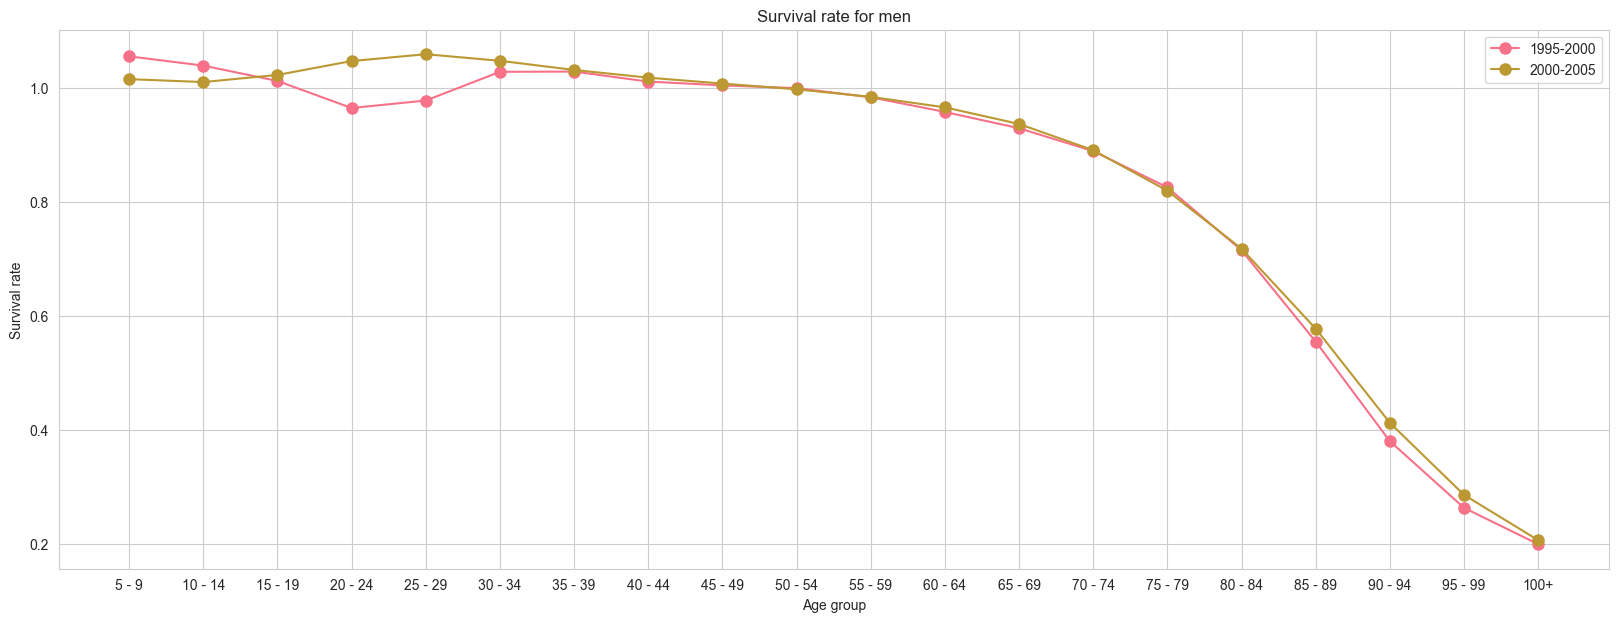

In [138]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = male_1950_2005_estimates.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(male_1950_2005_estimates, years_to_plot, 'men')

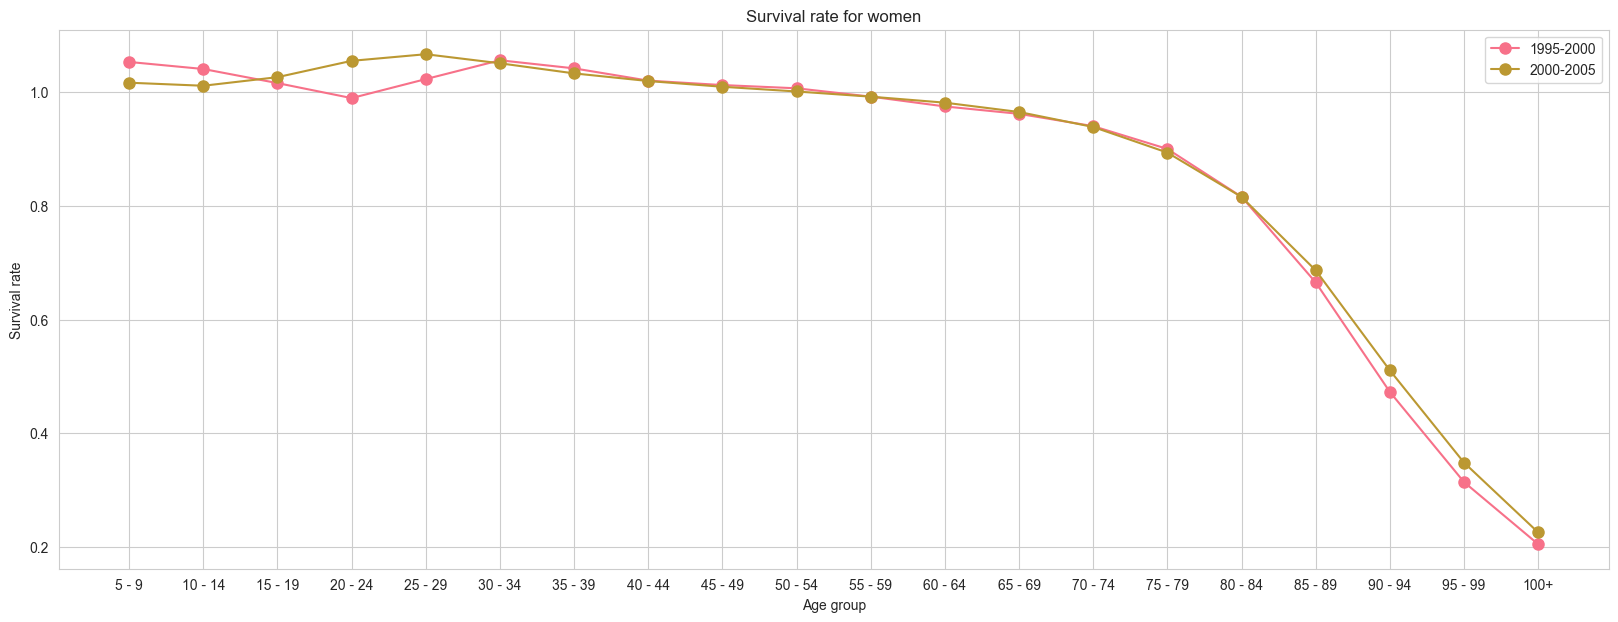

In [139]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = female_1950_2005_estimates.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(female_1950_2005_estimates, years_to_plot, 'women')

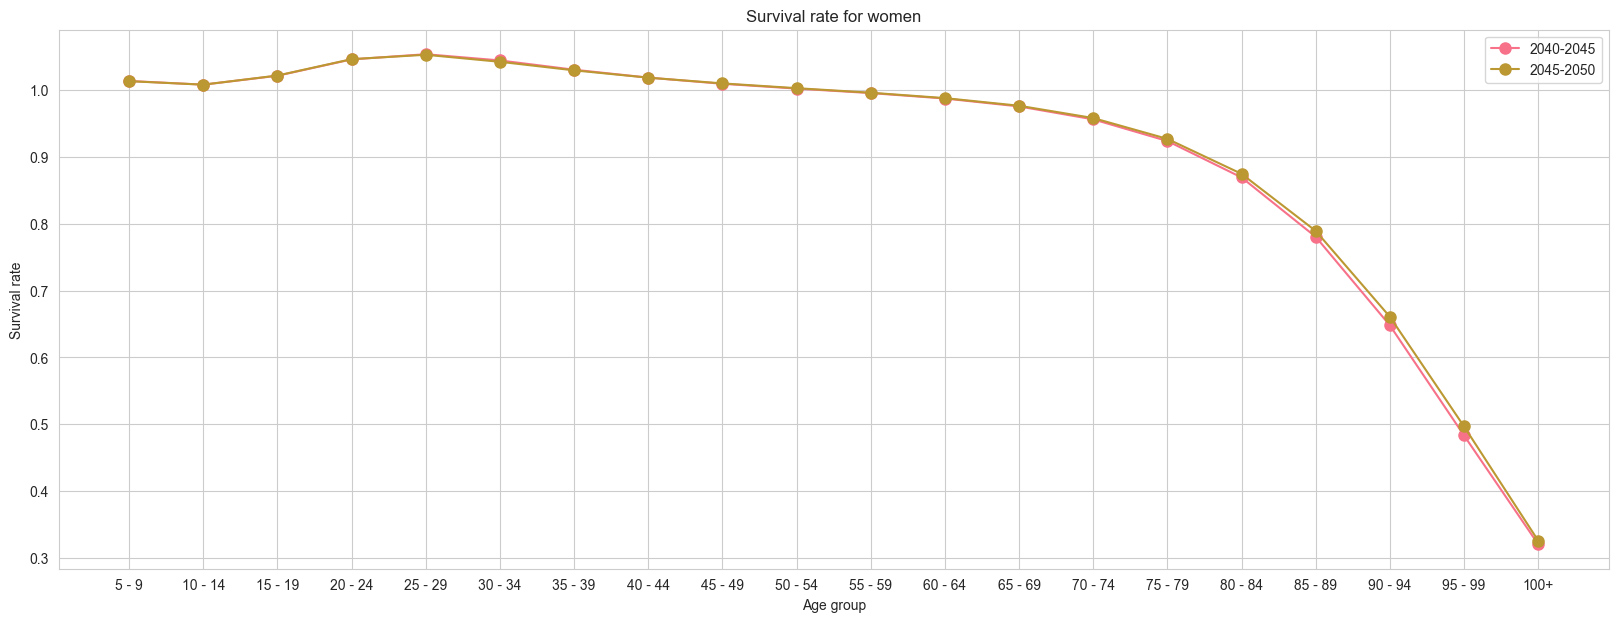

In [140]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = female_2010_2050_medium_fertility.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(female_2010_2050_medium_fertility, years_to_plot, 'women')

Task 2

Determine the fertility rate for women in the age category “'20 - 24', '25 - 29', '30 - 34', '35 - 39'”

In [141]:
def get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups):
    """
    Calculate the fertility rate for a given year.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - year: The year to calculate the fertility rate for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    
    Returns:
    The fertility rate for the given year, defined as the ratio of the number of children
    to the number of women in the given age groups.
    """
    
    children_population = dataset_children.loc[year, child_age_group]
    women_population = dataset_women.loc[year, women_age_groups].sum()
    
    return children_population / women_population


In [142]:
# Usage:
child_age_group = '0 - 4'
women_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']

get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, child_age_group, women_age_groups)

0.3572446699182366

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fertility_rates(dataset_children, dataset_women, start_year, end_year, child_age_group, women_age_groups):
    """
    Plot the fertility rate over a range of years.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - start_year, end_year: The range of years to plot fertility rates for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    """
    
    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    years = list(range(start_year, end_year + 1, 5))
    fertility_rates = []

    for year in years:
        fertility_rate = get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups)
        fertility_rates.append(fertility_rate)
    
    # Plot the fertility rates as a line on the figure
    plt.plot(years, fertility_rates, linestyle='-', marker='o', markersize=8)

    # Set the title of the figure
    plt.title(f'Fertility rate from {start_year} to {end_year}')
    
    # Set the label for the x-axis
    plt.xlabel('Year')

    # Set the label for the y-axis
    plt.ylabel('Fertility rate')

    # Show the figure
    plt.show()


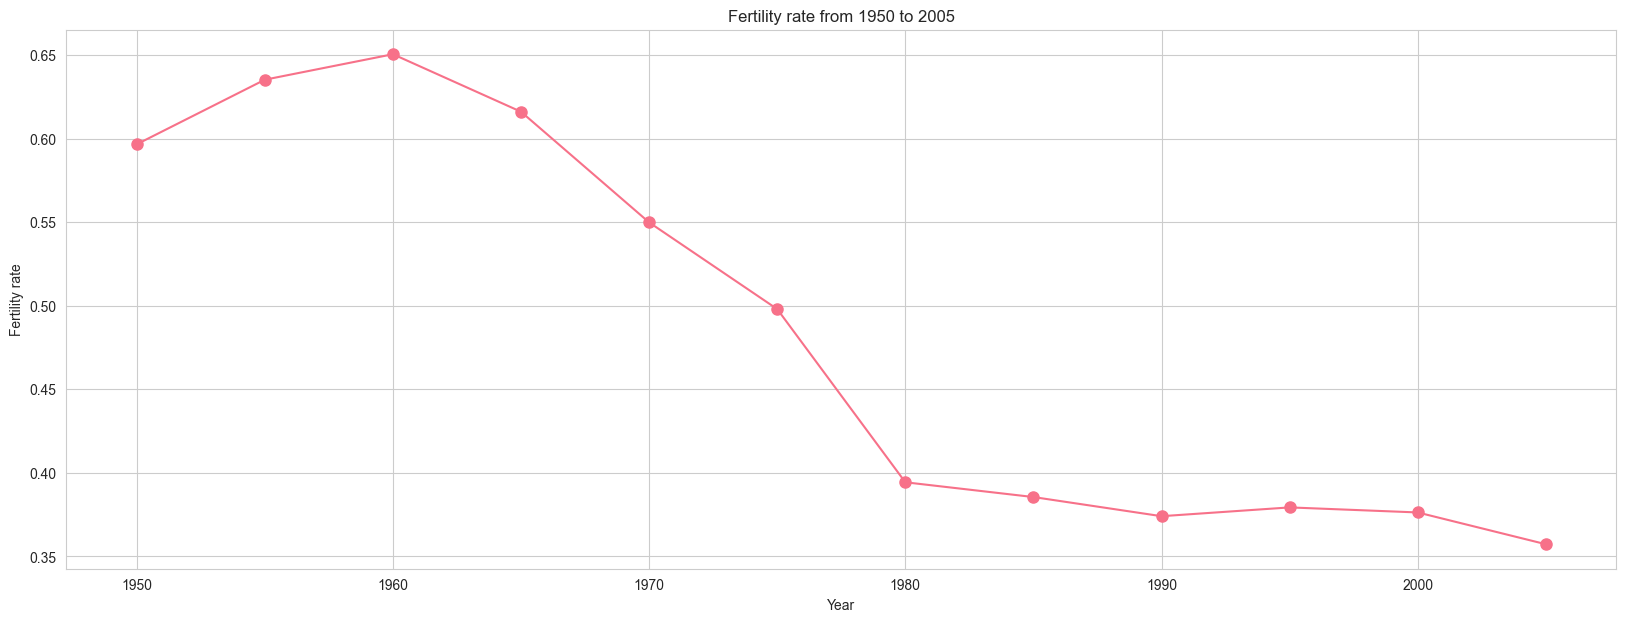

In [144]:
plot_fertility_rates(both_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, child_age_group, women_age_groups)


Task 3

Calculate boys/girls ratio for newborn children

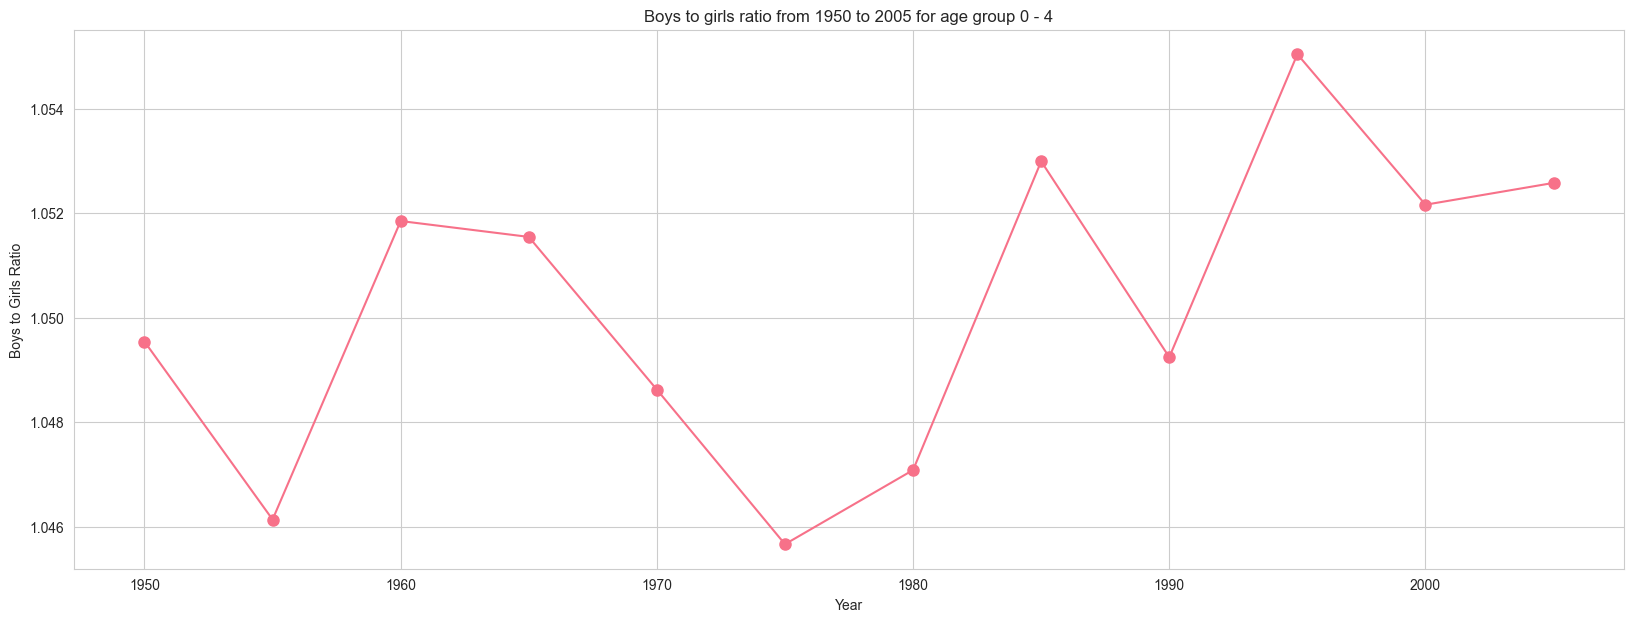

In [145]:
def plot_gender_ratio(dataset_men, dataset_women, start_year, end_year, age_group):
    """
    Plot the boys to girls ratio over a range of years.

    Parameters:
    - dataset_men: DataFrame containing population data for boys/men.
    - dataset_women: DataFrame containing population data for girls/women.
    - start_year, end_year: The range of years to plot gender ratios for.
    - age_group: The age group to consider (e.g., '0 - 4').
    """
    
    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    years = list(range(start_year, end_year + 1, 5))  # Adjust this line to account for 5-year intervals
    gender_ratios = []

    for year in years:
        boys = dataset_men.loc[year, age_group]
        girls = dataset_women.loc[year, age_group]
        ratio = boys / girls
        gender_ratios.append(ratio)

    # Plot the gender ratios as a line on the figure
    plt.plot(years, gender_ratios, linestyle='-', marker='o', markersize=8)

    # Set the title of the figure
    plt.title(f'Boys to girls ratio from {start_year} to {end_year} for age group {age_group}')

    # Set the label for the x-axis
    plt.xlabel('Year')

    # Set the label for the y-axis
    plt.ylabel('Boys to Girls Ratio')

    # Show the figure
    plt.show()

# Call the function with appropriate arguments:
plot_gender_ratio(male_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, '0 - 4')


Task 4

Predict the change in the country's population and demographic profile for 100 years and compare with existing prediction!


In [146]:
category = both_1950_2005_estimates.columns

def get_boy_prob(year):
    return male_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

def get_girl_prob(year):
    return female_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

In [157]:
get_boy_prob(2005)

0.5128076343545956

In [147]:
def generate_population_projection(age_groups, start_year, end_year, survival_rate, fertility, girl_probability, boy_probability, female_estimates, male_estimates, both_estimates, fertility_age_groups):
    """
    This function generates population projections based on the given parameters.

    Parameters:
    age_groups (list): Age groups to consider in the simulation.
    start_year (int): Year to start the simulation.
    end_year (int): Year to end the simulation.
    survival_rate (float): The survival rate used for simulation.
    fertility (float): The fertility rate used for simulation.
    girl_probability (float): The probability of a newborn being a girl.
    boy_probability (float): The probability of a newborn being a boy.
    female_estimates (pd.DataFrame): The initial population estimates for females.
    male_estimates (pd.DataFrame): The initial population estimates for males.
    both_estimates (pd.DataFrame): The initial population estimates for both genders.
    fertility_age_groups (list): Age groups that can contribute to fertility.

    Returns:
    population_projections (pd.DataFrame): A DataFrame containing the population projections for each age group and each year.
    """
    
    # Create a list of years for which the simulation will run
    years = list(range(start_year, end_year+1, 5))

    # Initialize the DataFrame for storing the population projections
    population_projections = pd.DataFrame(index=range(start_year, end_year+1, 5), columns=age_groups)
    
    # Populate the projections for the start year with initial population estimates
    population_projections.loc[start_year] = both_estimates.loc[start_year]
    
    # For each year in the simulation...
    for i in range(len(years) -1):
        # Compute the female newborns based on fertility rate, relevant age group population, and girl probability
        f_0 = female_estimates.loc[years[i+1],age_groups[0]] = fertility * female_estimates.loc[years[i], fertility_age_groups].sum() * girl_probability
        # Compute the remaining female population based on survival rate and previous year's population
        f_1 = female_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * female_estimates.loc[years[i]].shift(periods = 1)
        # Compute the male newborns based on fertility rate, relevant age group population, and boy probability
        m_0 = male_estimates.loc[years[i+1],age_groups[0]] = fertility * male_estimates.loc[years[i], fertility_age_groups].sum() * boy_probability
        # Compute the remaining male population based on survival rate and previous year's population
        m_1 = male_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * male_estimates.loc[years[i]].shift(periods = 1)
        
        # Update the population projections with the computed values for newborns and remaining population
        population_projections.loc[years[i+1],age_groups[0]] = f_0 + m_0
        population_projections.loc[years[i+1],age_groups[1:]] = f_1 + m_1

    # Return the final population projections
    return population_projections


In [148]:
# Model's parameters

# Year to start the simulation
start_year = 2005

# Year to end the simulation
end_year = 2100

# Age groups to consider in the simulation
age_groups = ['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', 
              '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']

# Age groups that can contribute to fertility
fertility_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']

# The survival rate used for simulation. Here, it is fetched from another function `get_survival_rate`
survival_rate = get_survival_rate(both_1950_2005_estimates, 2000, 2005).loc[2005]

# The fertility rate used for simulation. It is fetched from another function `get_fertility_rate`
fertility = get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, child_age_group, women_age_groups)

# The probability of a newborn being a girl, fetched from another function `get_girl_prob`
girl_probability = get_girl_prob(2005)

# The probability of a newborn being a boy, fetched from another function `get_boy_prob`
boy_probability = get_boy_prob(2005)

# The initial population estimates for females
female_estimates = female_1950_2005_estimates.copy()

# The initial population estimates for males
male_estimates = male_1950_2005_estimates.copy()

# The initial population estimates for both genders
both_estimates = both_1950_2005_estimates.copy()

# Model's Execution

# Call the `generate_population_projection` function to run the simulation 
# The function uses the parameters defined above to simulate the population projections
population_projections = generate_population_projection(
    age_groups = age_groups,
    start_year = start_year,
    end_year = end_year,
    survival_rate = survival_rate,
    fertility = fertility,
    girl_probability = girl_probability,
    boy_probability = boy_probability,
    female_estimates = female_estimates,
    male_estimates = male_estimates,
    both_estimates = both_estimates,
    fertility_age_groups = fertility_age_groups,
)


In [149]:
def plot_comparison(year):
    plt.figure(figsize = (20,7))
    plt.plot(population_projections.loc[year], label = 'Predict by me')
    plt.plot(both_2010_2050_medium_fertility.loc[year], label = 'Predict by UN')
    plt.legend()
    plt.title('Comparison my and UN forecast')
    plt.show();

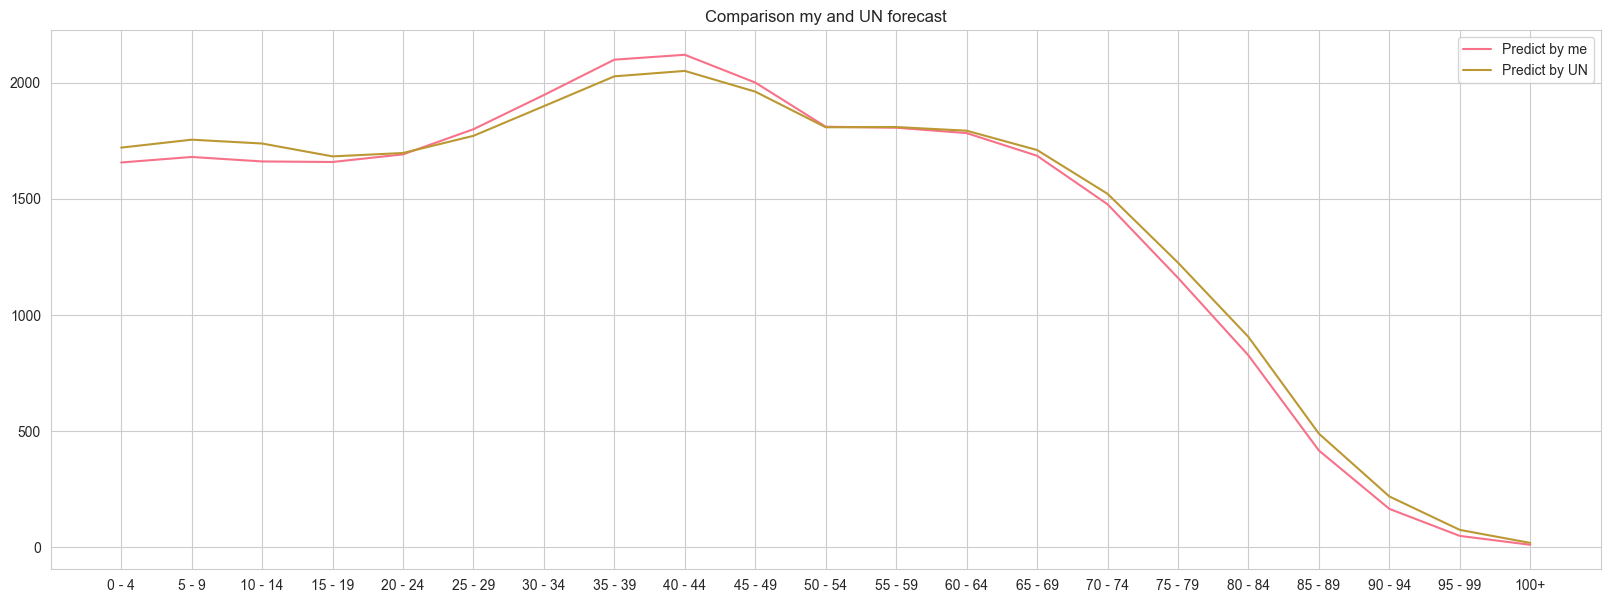

In [150]:
plot_comparison(2030)

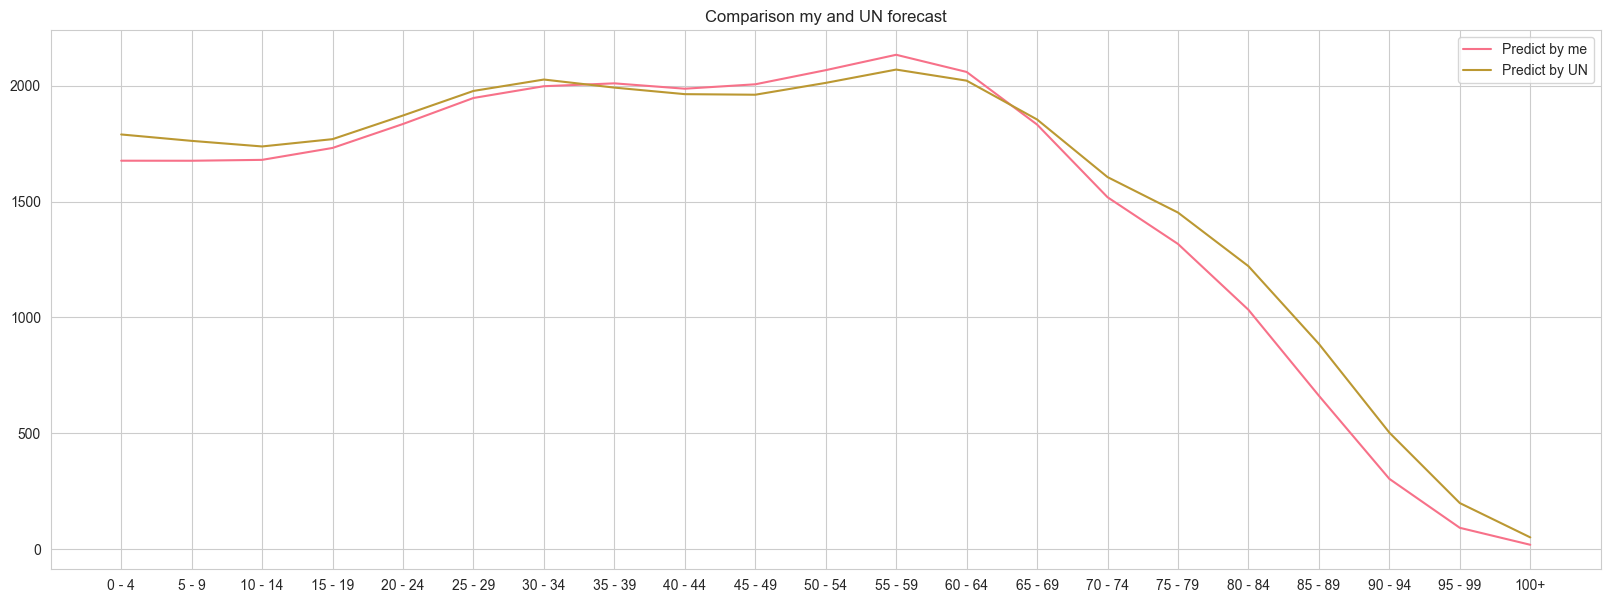

In [151]:
plot_comparison(2050)

Sensitivity Analysis (TASK 2)

In [154]:
!pip3 install salib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.2 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp311-cp311-macosx_12_0_arm64.whl (28.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.6 MB/s eta 0:00:00


In [156]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import random,math

Q. 1

Perform a sensitivity analysis for a demographic model with respect to a set of parameters: fertility rate, boys/girls ratio, «survival» rate for different age groups (not all can be taken). Model output: number of inhabitants for a given year. Test on the final forecast values ​​for 10, 20, 50, 100 years.


In [168]:
# Define models input
# We're defining a dictionary problem which will be used as an input for our model
# It contains the number of variables, their names, and the bounds for each variable

problem = {
    # Number of variables or parameters
    'num_vars': 10,  

    # Names of the variables
    'names': ['fertility_rate', 'boys_ratio', 'girls_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    
    # The ranges (bounds) of each of the variables as [min, max]
    'bounds': [
        [0.2, 1], # fertility rate
        [0.50, 0.55], # boys ratio
        [0.45, 0.50], # girls ratio
        [0, 1.016], # survival rate 5 - 9
        [0, 1.011], # survival rate 10 - 14
        [0, 1.023], # survival rate 15 - 19
        [0, 1.048], # survival rate 20 - 24
        [0, 1.060], # survival rate 25 - 29
        [0, 1.048], # survival rate 30 - 34
        [0, 1.032], # survival rate 35 - 39
    ]
}

# Evaluation
# This function evaluates the model based on the parameter values provided
# It simulates the population projection based on these parameter values and computes the total population in the last year

def Evaluate(param_values):
    Y = [] # Initializing an empty list to store results

    # Loop over each set of parameter values
    for params in param_values:
        # Assign each parameter to a separate variable
        fertility_rate = params[0]
        boys_ratio = params[1]
        girls_ratio = params[2]
        
        # Create survival rate array of the right size
        survival_rate_partial = params[3:9]
        survival_rate = np.ones(21) # Initialize survival rate as an array of ones
        survival_rate[1:7] = survival_rate_partial  # Replace the survival rates for age groups '5 - 9' to '35 - 39'

        # Run the population projection simulation using the parameters
        res = generate_population_projection(
                age_groups = age_groups,
                start_year = start_year,
                end_year = end_year,
                survival_rate = survival_rate,
                fertility = fertility_rate,
                girl_probability = girls_ratio,
                boy_probability = boys_ratio,
                female_estimates = female_estimates,
                male_estimates = male_estimates,
                both_estimates = both_estimates,
                fertility_age_groups = fertility_age_groups,
        )
        
        # Calculate the total population for the last year of simulation 
        total_population_last_year = res.iloc[-1].sum()     

        # Append the result to the list Y        
        Y.append(total_population_last_year)
    
    # Convert the list Y to a numpy array and return it    
    return np.array(Y)



# Generate samples of parameters using Saltelli's sampling scheme
param_values = saltelli.sample(problem, 500)

# Run the evaluation function to get the model output for each set of parameter values
Y = Evaluate(param_values)

# Perform sensitivity analysis on the output using Sobol's method
Si = sobol.analyze(problem, Y, print_to_console=False)

# Print the first-order sensitivity indices
# These indices represent the contribution of each input variable to the output's variance
# They provide an understanding of how much changing each parameter impacts the final result

print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_79795/3975760012.py:55: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[-0.01726864  0.00154191  0.00138426  0.15687767  0.05305523  0.0526451
  0.09180702  0.12020154  0.00036905  0.        ]


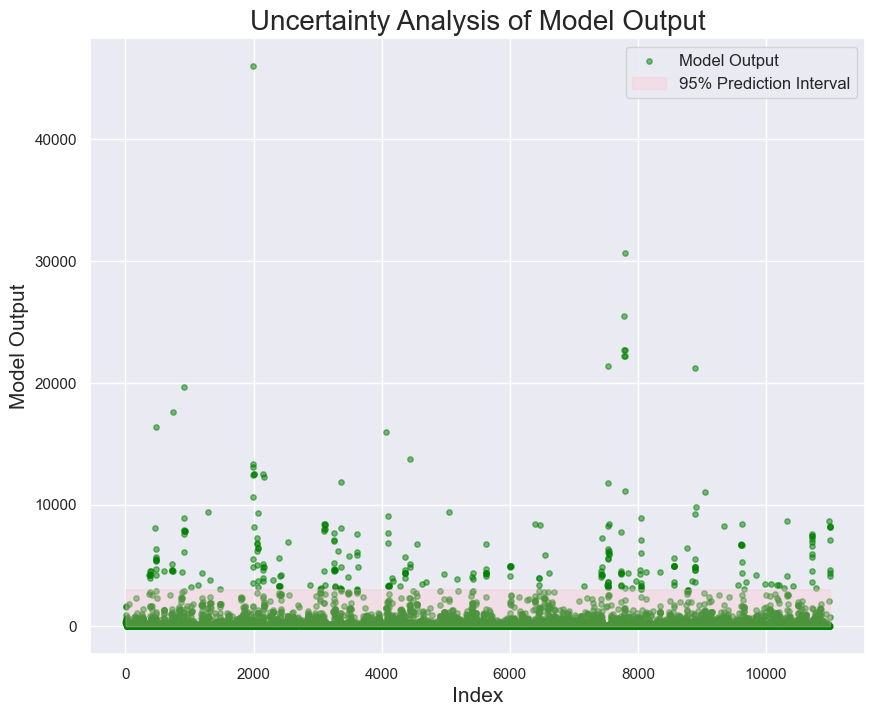

In [174]:
# Set Seaborn aesthetic parameters to defaults
sns.set()

# Define figure size
plt.figure(figsize=(10, 8))

# Scatter plot of the model output
plt.scatter(range(len(Y)), Y, s=15, color='green', alpha=0.5, label='Model Output')

# Calculate and plot prediction intervals
quantiles = [0.025, 0.975]
lower_bound = np.quantile(Y, quantiles[0], axis=0)
upper_bound = np.quantile(Y, quantiles[1], axis=0)
plt.fill_between(range(len(Y)), lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Prediction Interval')

# Aesthetics - labels and title
plt.title('Uncertainty Analysis of Model Output', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Model Output', fontsize=15)

# Increase size of legend
plt.legend(fontsize=12)

# Display grid
plt.grid(True)

# Show the plot
plt.show()


In [175]:
# Define models input
# We're defining a dictionary problem which will be used as an input for our model
# It contains the number of variables, their names, and the bounds for each variable

problem = {
    # Number of variables or parameters
    'num_vars': 10,  

    # Names of the variables
    'names': ['fertility_rate', 'boys_ratio', 'girls_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    
    # The ranges (bounds) of each of the variables as [min, max]
    'bounds': [
        [0.2, 1], # fertility rate
        [0.50, 0.55], # boys ratio
        [0.45, 0.50], # girls ratio
        [0, 1.016], # survival rate 5 - 9
        [0, 1.011], # survival rate 10 - 14
        [0, 1.023], # survival rate 15 - 19
        [0, 1.048], # survival rate 20 - 24
        [0, 1.060], # survival rate 25 - 29
        [0, 1.048], # survival rate 30 - 34
        [0, 1.032], # survival rate 35 - 39
    ]
}

# Evaluation
# This function evaluates the model based on the parameter values provided
# It simulates the population projection based on these parameter values and computes the total population in the last year

def Evaluate(param_values):
    Y = [] # Initializing an empty list to store results

    # Loop over each set of parameter values
    for params in param_values:
        # Assign each parameter to a separate variable
        fertility_rate = params[0]
        boys_ratio = params[1]
        girls_ratio = params[2]
        
        # Create survival rate array of the right size
        survival_rate_partial = params[3:9]
        survival_rate = np.ones(21) # Initialize survival rate as an array of ones
        survival_rate[1:7] = survival_rate_partial  # Replace the survival rates for age groups '5 - 9' to '35 - 39'

        # Run the population projection simulation using the parameters
        res = generate_population_projection(
                age_groups = age_groups,
                start_year = start_year,
                end_year = end_year,
                survival_rate = survival_rate,
                fertility = fertility_rate,
                girl_probability = girls_ratio,
                boy_probability = boys_ratio,
                female_estimates = female_estimates,
                male_estimates = male_estimates,
                both_estimates = both_estimates,
                fertility_age_groups = fertility_age_groups,
        )
        
        # Calculate the total population for the last year of simulation 
        total_population_last_year = res.iloc[-1].sum()     

        # Append the result to the list Y        
        Y.append(total_population_last_year)
    
    # Convert the list Y to a numpy array and return it    
    return np.array(Y)



# Generate samples of parameters using Saltelli's sampling scheme
param_values = saltelli.sample(problem, 500)

# Run the evaluation function to get the model output for each set of parameter values
Y = Evaluate(param_values)

# Perform sensitivity analysis on the output using Sobol's method
Si = sobol.analyze(problem, Y, print_to_console=False)

# Print the first-order sensitivity indices
# These indices represent the contribution of each input variable to the output's variance
# They provide an understanding of how much changing each parameter impacts the final result

print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_79795/2729509708.py:73: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[-0.01726864  0.00154191  0.00138426  0.15687767  0.05305523  0.0526451
  0.09180702  0.12020154  0.00036905  0.        ]


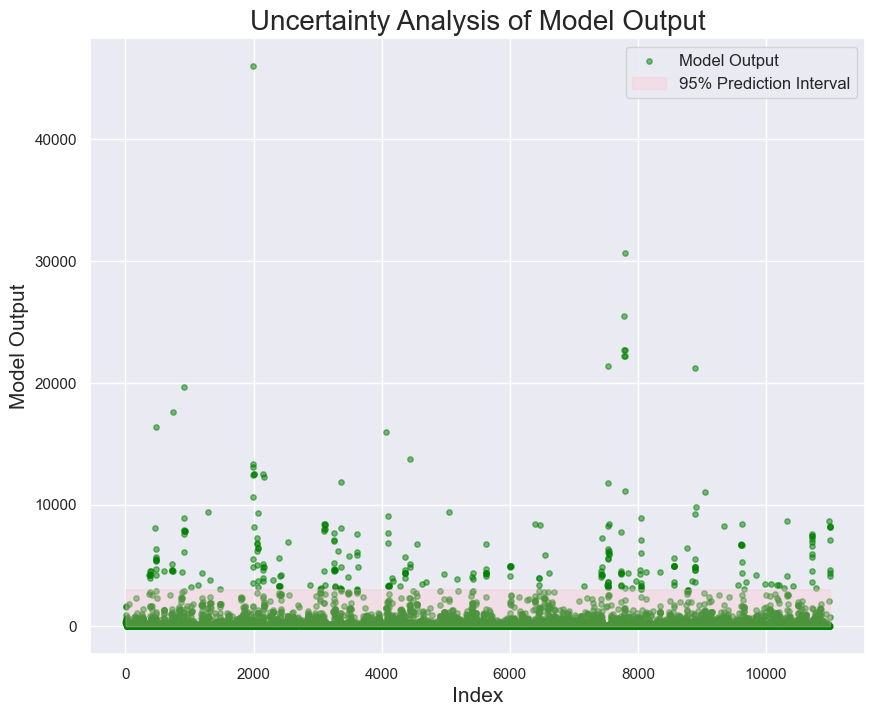

In [176]:
# Set Seaborn aesthetic parameters to defaults
sns.set()

# Define figure size
plt.figure(figsize=(10, 8))

# Scatter plot of the model output
plt.scatter(range(len(Y)), Y, s=15, color='green', alpha=0.5, label='Model Output')

# Calculate and plot prediction intervals
quantiles = [0.025, 0.975]
lower_bound = np.quantile(Y, quantiles[0], axis=0)
upper_bound = np.quantile(Y, quantiles[1], axis=0)
plt.fill_between(range(len(Y)), lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Prediction Interval')

# Aesthetics - labels and title
plt.title('Uncertainty Analysis of Model Output', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Model Output', fontsize=15)

# Increase size of legend
plt.legend(fontsize=12)

# Display grid
plt.grid(True)

# Show the plot
plt.show()


In [180]:
# Define models input
# We're defining a dictionary problem which will be used as an input for our model
# It contains the number of variables, their names, and the bounds for each variable

problem = {
    # Number of variables or parameters
    'num_vars': 10,  

    # Names of the variables
    'names': ['fertility_rate', 'boys_ratio', 'girls_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    
    # The ranges (bounds) of each of the variables as [min, max]
    'bounds': [
        [0.2, 1], # fertility rate
        [0.50, 0.55], # boys ratio
        [0.45, 0.50], # girls ratio
        [0, 1.016], # survival rate 5 - 9
        [0, 1.011], # survival rate 10 - 14
        [0, 1.023], # survival rate 15 - 19
        [0, 1.048], # survival rate 20 - 24
        [0, 1.060], # survival rate 25 - 29
        [0, 1.048], # survival rate 30 - 34
        [0, 1.032], # survival rate 35 - 39
    ]
}

# Evaluation
# This function evaluates the model based on the parameter values provided
# It simulates the population projection based on these parameter values and computes the total population in the last year

def Evaluate(param_values):
    Y = [] # Initializing an empty list to store results

    # Loop over each set of parameter values
    for params in param_values:
        # Assign each parameter to a separate variable
        fertility_rate = params[0]
        boys_ratio = params[1]
        girls_ratio = params[2]
        
        # Create survival rate array of the right size
        survival_rate_partial = params[3:9]
        survival_rate = np.ones(21) # Initialize survival rate as an array of ones
        survival_rate[1:7] = survival_rate_partial  # Replace the survival rates for age groups '5 - 9' to '35 - 39'

        # Run the population projection simulation using the parameters
        res = generate_population_projection(
                age_groups = age_groups,
                start_year = 2005,
                end_year = 2015,
                survival_rate = survival_rate,
                fertility = fertility_rate,
                girl_probability = girls_ratio,
                boy_probability = boys_ratio,
                female_estimates = female_estimates,
                male_estimates = male_estimates,
                both_estimates = both_estimates,
                fertility_age_groups = fertility_age_groups,
        )
        
        # Calculate the total population for the last year of simulation 
        total_population_last_year = res.iloc[-1].sum()     

        # Append the result to the list Y        
        Y.append(total_population_last_year)
    
    # Convert the list Y to a numpy array and return it    
    return np.array(Y)



# Generate samples of parameters using Saltelli's sampling scheme
param_values = saltelli.sample(problem, 500)

# Run the evaluation function to get the model output for each set of parameter values
Y = Evaluate(param_values)

# Perform sensitivity analysis on the output using Sobol's method
Si = sobol.analyze(problem, Y, print_to_console=False)

# Print the first-order sensitivity indices
# These indices represent the contribution of each input variable to the output's variance
# They provide an understanding of how much changing each parameter impacts the final result

print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_79795/1224815302.py:73: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[0.25572339 0.00027919 0.00035748 0.20300166 0.04551115 0.09386217
 0.09864341 0.11588392 0.16322961 0.        ]


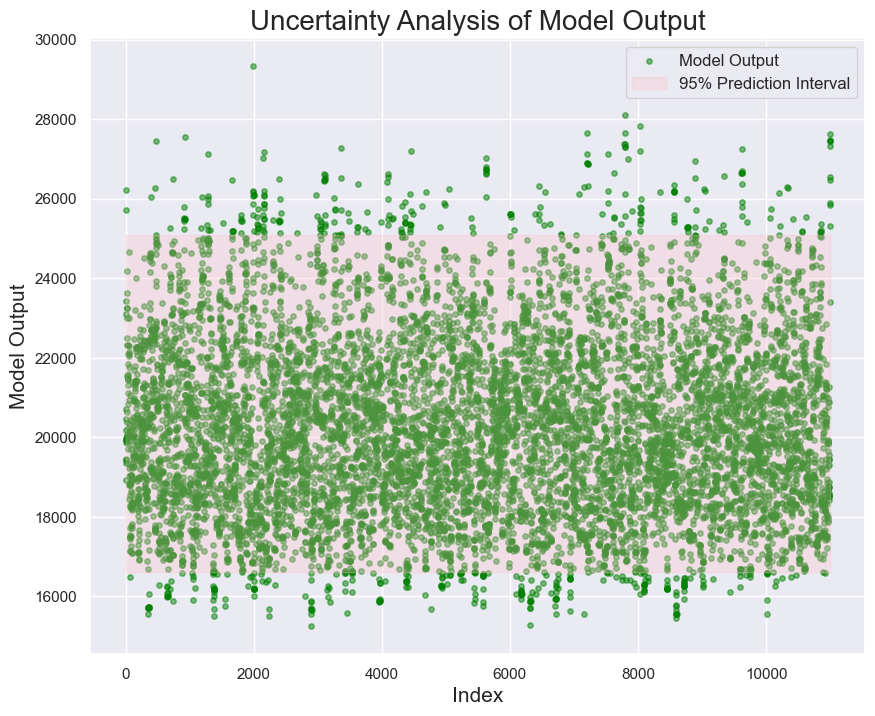

In [181]:
# Set Seaborn aesthetic parameters to defaults
sns.set()

# Define figure size
plt.figure(figsize=(10, 8))

# Scatter plot of the model output
plt.scatter(range(len(Y)), Y, s=15, color='green', alpha=0.5, label='Model Output')

# Calculate and plot prediction intervals
quantiles = [0.025, 0.975]
lower_bound = np.quantile(Y, quantiles[0], axis=0)
upper_bound = np.quantile(Y, quantiles[1], axis=0)
plt.fill_between(range(len(Y)), lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Prediction Interval')

# Aesthetics - labels and title
plt.title('Uncertainty Analysis of Model Output', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Model Output', fontsize=15)

# Increase size of legend
plt.legend(fontsize=12)

# Display grid
plt.grid(True)

# Show the plot
plt.show()


In [182]:
# Define models input
# We're defining a dictionary problem which will be used as an input for our model
# It contains the number of variables, their names, and the bounds for each variable

problem = {
    # Number of variables or parameters
    'num_vars': 10,  

    # Names of the variables
    'names': ['fertility_rate', 'boys_ratio', 'girls_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    
    # The ranges (bounds) of each of the variables as [min, max]
    'bounds': [
        [0.2, 1], # fertility rate
        [0.50, 0.55], # boys ratio
        [0.45, 0.50], # girls ratio
        [0, 1.016], # survival rate 5 - 9
        [0, 1.011], # survival rate 10 - 14
        [0, 1.023], # survival rate 15 - 19
        [0, 1.048], # survival rate 20 - 24
        [0, 1.060], # survival rate 25 - 29
        [0, 1.048], # survival rate 30 - 34
        [0, 1.032], # survival rate 35 - 39
    ]
}

# Evaluation
# This function evaluates the model based on the parameter values provided
# It simulates the population projection based on these parameter values and computes the total population in the last year

def Evaluate(param_values):
    Y = [] # Initializing an empty list to store results

    # Loop over each set of parameter values
    for params in param_values:
        # Assign each parameter to a separate variable
        fertility_rate = params[0]
        boys_ratio = params[1]
        girls_ratio = params[2]
        
        # Create survival rate array of the right size
        survival_rate_partial = params[3:9]
        survival_rate = np.ones(21) # Initialize survival rate as an array of ones
        survival_rate[1:7] = survival_rate_partial  # Replace the survival rates for age groups '5 - 9' to '35 - 39'

        # Run the population projection simulation using the parameters
        res = generate_population_projection(
                age_groups = age_groups,
                start_year = 2005,
                end_year = 2025,
                survival_rate = survival_rate,
                fertility = fertility_rate,
                girl_probability = girls_ratio,
                boy_probability = boys_ratio,
                female_estimates = female_estimates,
                male_estimates = male_estimates,
                both_estimates = both_estimates,
                fertility_age_groups = fertility_age_groups,
        )
        
        # Calculate the total population for the last year of simulation 
        total_population_last_year = res.iloc[-1].sum()     

        # Append the result to the list Y        
        Y.append(total_population_last_year)
    
    # Convert the list Y to a numpy array and return it    
    return np.array(Y)



# Generate samples of parameters using Saltelli's sampling scheme
param_values = saltelli.sample(problem, 500)

# Run the evaluation function to get the model output for each set of parameter values
Y = Evaluate(param_values)

# Perform sensitivity analysis on the output using Sobol's method
Si = sobol.analyze(problem, Y, print_to_console=False)

# Print the first-order sensitivity indices
# These indices represent the contribution of each input variable to the output's variance
# They provide an understanding of how much changing each parameter impacts the final result

print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_79795/1908913893.py:73: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[5.32699408e-02 1.46318971e-04 4.56131177e-05 1.30159922e-01
 8.68451918e-02 8.68960284e-02 6.66057682e-02 1.61766734e-01
 2.82625039e-01 0.00000000e+00]


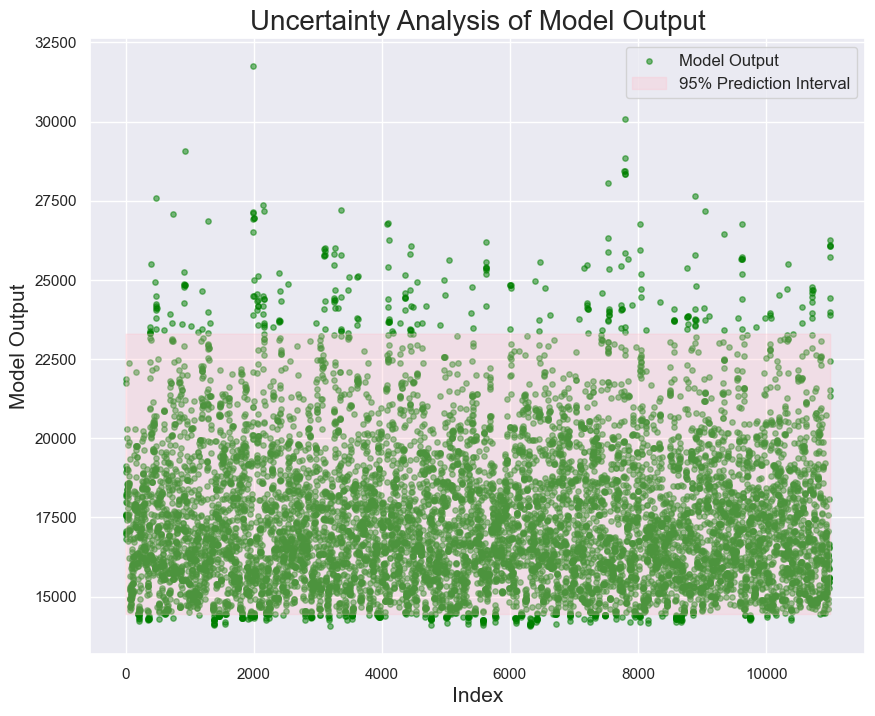

In [183]:
# Set Seaborn aesthetic parameters to defaults
sns.set()

# Define figure size
plt.figure(figsize=(10, 8))

# Scatter plot of the model output
plt.scatter(range(len(Y)), Y, s=15, color='green', alpha=0.5, label='Model Output')

# Calculate and plot prediction intervals
quantiles = [0.025, 0.975]
lower_bound = np.quantile(Y, quantiles[0], axis=0)
upper_bound = np.quantile(Y, quantiles[1], axis=0)
plt.fill_between(range(len(Y)), lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Prediction Interval')

# Aesthetics - labels and title
plt.title('Uncertainty Analysis of Model Output', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Model Output', fontsize=15)

# Increase size of legend
plt.legend(fontsize=12)

# Display grid
plt.grid(True)

# Show the plot
plt.show()


In [184]:
# Define models input
# We're defining a dictionary problem which will be used as an input for our model
# It contains the number of variables, their names, and the bounds for each variable

problem = {
    # Number of variables or parameters
    'num_vars': 10,  

    # Names of the variables
    'names': ['fertility_rate', 'boys_ratio', 'girls_ratio', 'surv_5_9', 'surv_10_14', 'surv_15_19', 'surv_20_24', 'surv_25_29', 'surv_30_34', 'surv_35_39'], 
    
    # The ranges (bounds) of each of the variables as [min, max]
    'bounds': [
        [0.2, 1], # fertility rate
        [0.50, 0.55], # boys ratio
        [0.45, 0.50], # girls ratio
        [0, 1.016], # survival rate 5 - 9
        [0, 1.011], # survival rate 10 - 14
        [0, 1.023], # survival rate 15 - 19
        [0, 1.048], # survival rate 20 - 24
        [0, 1.060], # survival rate 25 - 29
        [0, 1.048], # survival rate 30 - 34
        [0, 1.032], # survival rate 35 - 39
    ]
}

# Evaluation
# This function evaluates the model based on the parameter values provided
# It simulates the population projection based on these parameter values and computes the total population in the last year

def Evaluate(param_values):
    Y = [] # Initializing an empty list to store results

    # Loop over each set of parameter values
    for params in param_values:
        # Assign each parameter to a separate variable
        fertility_rate = params[0]
        boys_ratio = params[1]
        girls_ratio = params[2]
        
        # Create survival rate array of the right size
        survival_rate_partial = params[3:9]
        survival_rate = np.ones(21) # Initialize survival rate as an array of ones
        survival_rate[1:7] = survival_rate_partial  # Replace the survival rates for age groups '5 - 9' to '35 - 39'

        # Run the population projection simulation using the parameters
        res = generate_population_projection(
                age_groups = age_groups,
                start_year = 2005,
                end_year = 2045,
                survival_rate = survival_rate,
                fertility = fertility_rate,
                girl_probability = girls_ratio,
                boy_probability = boys_ratio,
                female_estimates = female_estimates,
                male_estimates = male_estimates,
                both_estimates = both_estimates,
                fertility_age_groups = fertility_age_groups,
        )
        
        # Calculate the total population for the last year of simulation 
        total_population_last_year = res.iloc[-1].sum()     

        # Append the result to the list Y        
        Y.append(total_population_last_year)
    
    # Convert the list Y to a numpy array and return it    
    return np.array(Y)



# Generate samples of parameters using Saltelli's sampling scheme
param_values = saltelli.sample(problem, 500)

# Run the evaluation function to get the model output for each set of parameter values
Y = Evaluate(param_values)

# Perform sensitivity analysis on the output using Sobol's method
Si = sobol.analyze(problem, Y, print_to_console=False)

# Print the first-order sensitivity indices
# These indices represent the contribution of each input variable to the output's variance
# They provide an understanding of how much changing each parameter impacts the final result

print("__________________")
print(Si['S1'])

/var/folders/7v/b_qdblv15hg0h789msb73v4r0000gn/T/ipykernel_79795/750303955.py:73: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 500)
/Users/macbookpro/Documents/discrete modelling tasks/.venv/lib/python3.11/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (500) is equal to `2^n`.
        
  warnings.warn(msg)


__________________
[-6.53412637e-03  6.23221940e-05  4.38985330e-04  8.48314518e-02
  5.39287269e-02  6.12222153e-02  8.87701426e-02  1.74446564e-01
  3.05446858e-01  0.00000000e+00]


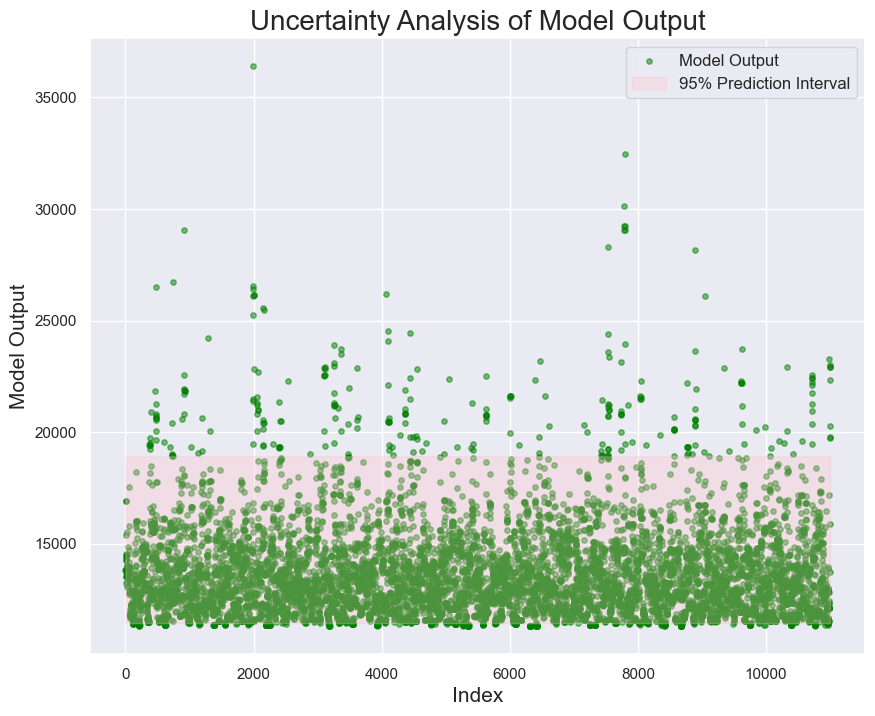

In [185]:
# Set Seaborn aesthetic parameters to defaults
sns.set()

# Define figure size
plt.figure(figsize=(10, 8))

# Scatter plot of the model output
plt.scatter(range(len(Y)), Y, s=15, color='green', alpha=0.5, label='Model Output')

# Calculate and plot prediction intervals
quantiles = [0.025, 0.975]
lower_bound = np.quantile(Y, quantiles[0], axis=0)
upper_bound = np.quantile(Y, quantiles[1], axis=0)
plt.fill_between(range(len(Y)), lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Prediction Interval')

# Aesthetics - labels and title
plt.title('Uncertainty Analysis of Model Output', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Model Output', fontsize=15)

# Increase size of legend
plt.legend(fontsize=12)

# Display grid
plt.grid(True)

# Show the plot
plt.show()
